In [1]:
%matplotlib inline

In [2]:
import datetime
import math

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from grizz.utils.interval import interval_to_strftime_format

from flamme import plot
from flamme.plot.utils import readable_xticklabels
from flamme.plot.utils.hist import adjust_nbins, find_nbins
from flamme.section.continuous_drift import create_temporal_drift_figure
from flamme.utils.data import datetime_range

In [3]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (16, 5)

In [4]:
random_seed = 15803713921897248048
rng = np.random.default_rng()

## plot_cdf

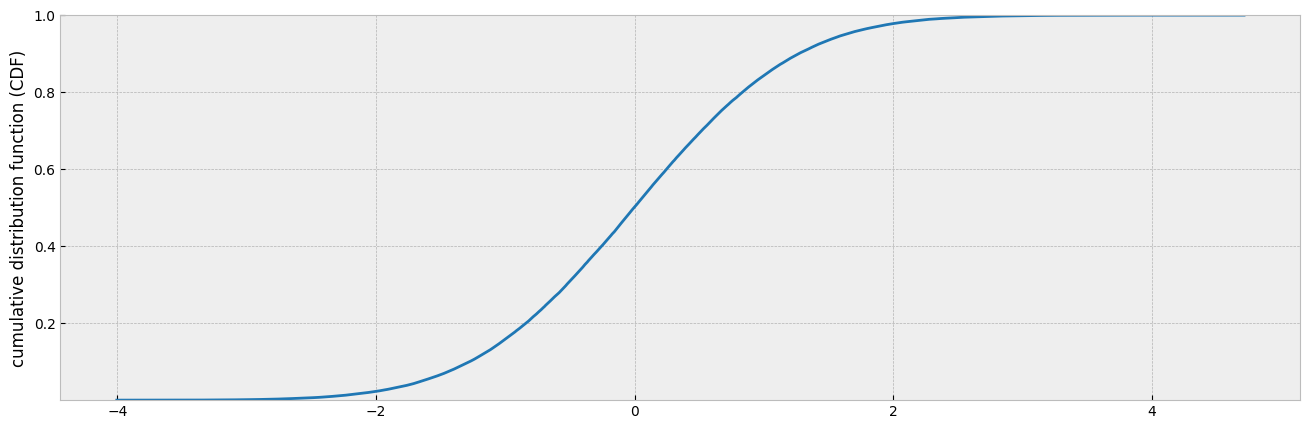

In [5]:
fig, ax = plt.subplots()
array = rng.standard_normal(100000)
plot.plot_cdf(ax=ax, array=array)

## hist_continuous

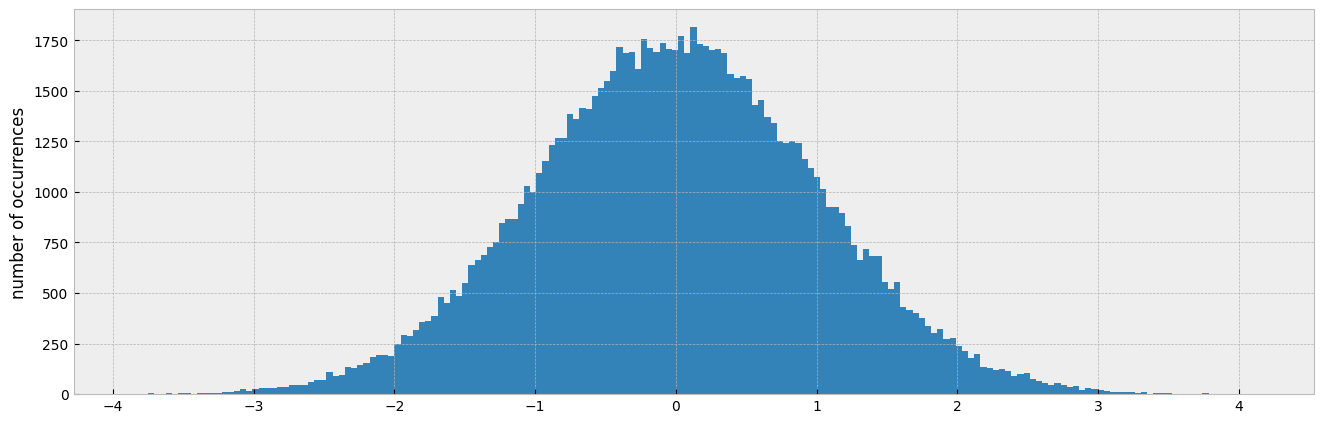

In [6]:
fig, ax = plt.subplots()
array = rng.standard_normal(100000)
plot.hist_continuous(ax=ax, array=array, nbins=201, cdf=False, quantile=False)

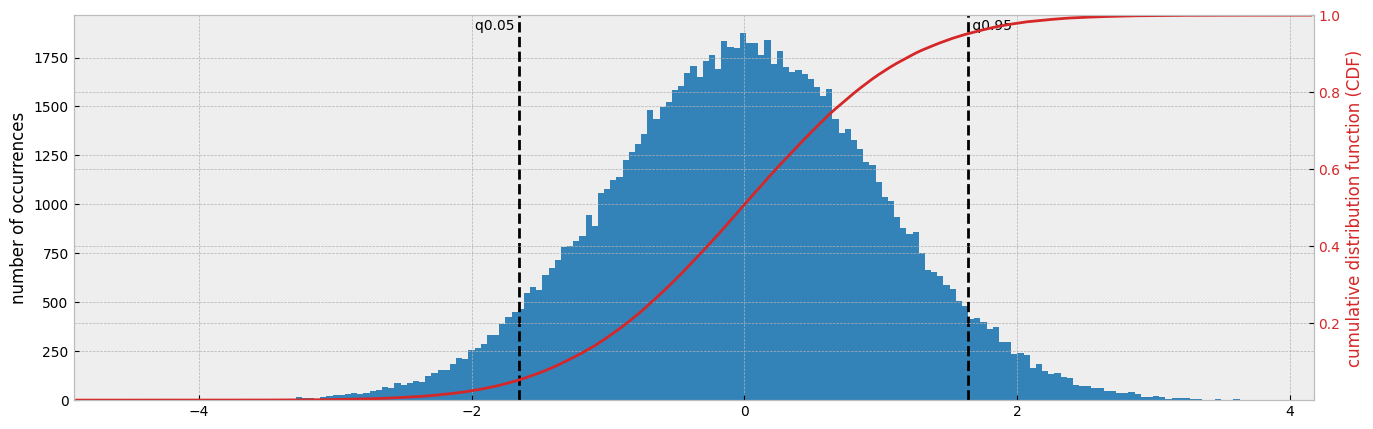

In [7]:
fig, ax = plt.subplots()
array = rng.standard_normal(100000)
plot.hist_continuous(ax=ax, array=array, nbins=201)

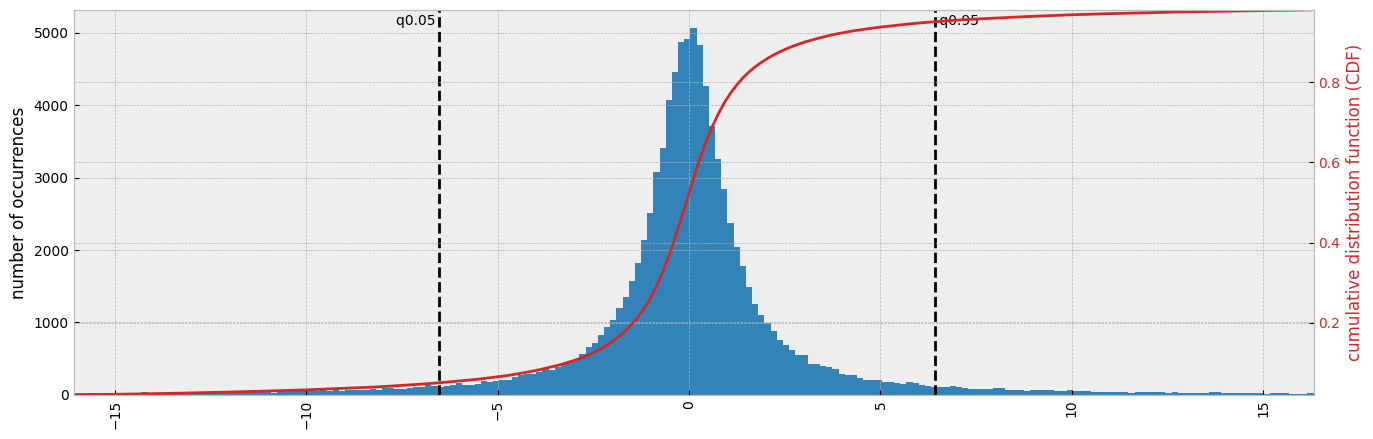

In [8]:
fig, ax = plt.subplots()
array = rng.standard_cauchy(100000)
plot.hist_continuous(ax=ax, array=array, nbins=201, xmin="q0.02", xmax="q0.98")

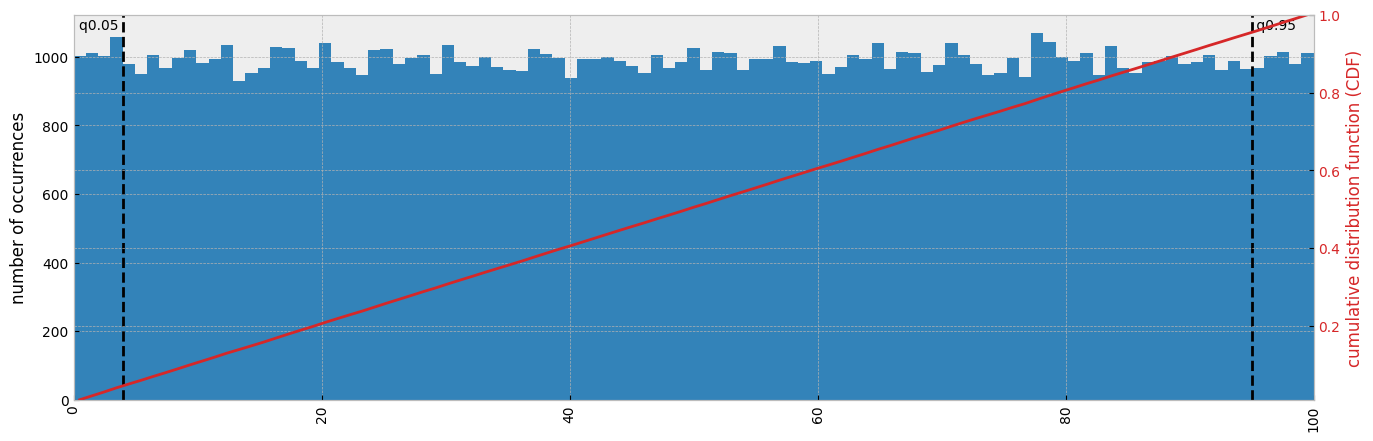

In [10]:
array = rng.integers(low=0, high=101, size=(100000,))
nbins = adjust_nbins(nbins=200, array=array)
fig, ax = plt.subplots()
plot.hist_continuous(ax=ax, array=array, nbins=nbins)

In [ ]:
array = rng.integers(low=0, high=101, size=(100000,))
nbins = find_nbins(bin_size=1, min=np.min(array), max=np.max(array))
fig, ax = plt.subplots()
plot.hist_continuous(ax=ax, array=array, nbins=nbins)

## hist_continuous2

In [ ]:
fig, ax = plt.subplots()
array1 = rng.standard_normal(1000000)
array2 = rng.standard_normal(100000) * 0.7 + 0.2
plot.hist_continuous2(ax=ax, array1=array1, array2=array2, nbins=201)

In [ ]:
fig, ax = plt.subplots()
plot.hist_continuous2(ax=ax, array1=array1, array2=array2, nbins=201, density=True)

## boxplot_continuous

In [ ]:
fig, ax = plt.subplots()
array = rng.standard_normal(100000)
plot.boxplot_continuous(ax=ax, array=array)

## boxplot_continuous_temporal

In [ ]:
fig, ax = plt.subplots()
data = [
    rng.standard_normal(1000) * (2 + math.cos(i)) + 2 * math.sin(i) + 0.5 * i for i in range(10)
]
plot.boxplot_continuous_temporal(ax=ax, data=data, steps=list(range(len(data))))

## plot_null_temporal

In [ ]:
n = 100
values = list(range(n))
nulls = [math.cos(x * 0.5) * 50 + 100 for x in values]
totals = [math.cos(x * 0.5) * 50 + 200 + 2 * x for x in values]
labels = datetime_range(
    start=datetime.datetime(year=2017, month=1, day=1, tzinfo=datetime.timezone.utc),
    periods=n,
    interval="1d",
    eager=True,
)

fig, ax = plt.subplots()
plot.plot_null_temporal(ax=ax, nulls=nulls, totals=totals, labels=labels)
readable_xticklabels(ax)

In [ ]:
n = 100000
values = rng.standard_normal(n) + np.arange(n) * 0.001
frame = pl.DataFrame(
    {
        "value": values,
        "date": datetime_range(
            start=datetime.datetime(year=2017, month=1, day=1, tzinfo=datetime.timezone.utc),
            periods=n,
            interval="2m",
            eager=True,
        ),
    }
)
_ = create_temporal_drift_figure(
    frame, column="value", dt_column="date", period="1mo", figsize=(16, 5), nbins=301
)

## bar_discrete

In [ ]:
fig, ax = plt.subplots()
plot.bar_discrete(ax, names=["a", "b", "c", "d"], counts=[5, 100, 42, 27])

In [ ]:
fig, ax = plt.subplots()
plot.bar_discrete(ax, names=["a", "b", "c", "d"], counts=[5, 1001, 42, 27])

## bar_discrete_temporal

In [ ]:
num_values, num_steps = 5, 100
counts = np.abs(5 + 2 * rng.standard_normal(size=(num_values, num_steps)))

values = [f"value{i}" for i in range(num_values)]
period = "6h"
steps = pl.datetime_range(
    start=datetime.datetime(year=2018, month=1, day=1, tzinfo=datetime.timezone.utc),
    end=datetime.datetime(year=2018, month=1, day=1, tzinfo=datetime.timezone.utc)
    + datetime.timedelta(hours=6 * num_steps - 1),
    interval=period,
    eager=True,
)
format_dt = interval_to_strftime_format(period)
steps = [step.strftime(format_dt) for step in steps]

fig, ax = plt.subplots()
plot.bar_discrete_temporal(ax=ax, counts=counts, values=values, steps=steps)

In [ ]:
fig, ax = plt.subplots()
plot.bar_discrete_temporal(ax=ax, counts=counts, values=values, steps=steps, proportion=True)